# Learning to recognize handwritten digits using a neural network

We have now reached the point where we can tackle a very interesting task: applying the knowledge we have gained with machine learning in general, and `Flux.jl` in particular, to create a neural network that can recognize handwritten digits! The data are from a data set called MNIST, which has become a classic in the machine learning world.

[We could also try to apply the techniques to the original images of fruit instead. However, the fruit images are much larger than the MNIST images, which makes the learning a suitable neural network too slow.]

## Data munging

As we know, the first difficulty with any new data set is locating it, understanding what format it is stored in, reading it in and decoding it into a useful data structure in Julia.

The original MNIST data is available [here](http://yann.lecun.com/exdb/mnist); see also the [Wikipedia page](https://en.wikipedia.org/wiki/MNIST_database). However, the format that the data is stored in is rather obscure.

Fortunately, various packages in Julia provide nicer interfaces to access it. We will use the one provided by `Flux.jl`.

The data are images of handwritten digits, and the corresponding labels that were determined by hand (i.e. by humans). Our job will be to get the computer to **learn** to recognize digits by learning, as usual, the function that relates the input and output data.

### Loading and examining the data

First we load the required packages:

In [26]:
]st

Status `~/odsceurpoe/ODSCEurope2020/Project.toml`
  [336ed68f] CSV v0.7.7
  [31c24e10] Distributions v0.23.11
  [587475ba] Flux v0.11.1
  [86fae568] ImageView v0.10.9
  [916415d5] Images v0.22.4
  [23992714] MAT v0.8.1
  [dbeba491] Metalhead v0.5.1
  [91a5bcdd] Plots v1.0.14
  [2913bbd2] StatsBase v0.33.1
  [009559a3] XGBoost v1.1.1
  [e88e6eb3] Zygote v0.5.7
  [10745b16] Statistics


In [27]:
# using Pkg; Pkg.add("Flux")
using Flux, Flux.Data.MNIST

Now we read in the data:

In [28]:
labels = MNIST.labels();
images = MNIST.images();

#### Exercise 1

Examine the `labels` data. Then examine the first few images. *Do not try to view the whole of the `images` object!* Try to drill down to discover how the data is laid out.

#### Solution

In [29]:
labels

60000-element Array{Int64,1}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

We see that `labels` is a standard Julia vector of length 60,000. Each label is a digit from 0 to 9 that is the human-determined label of the corresponding image.

In [31]:
typeof(images)

Array{Array{Gray{Normed{UInt8,8}},2},1}

We see that `images` is a `Vector`, i.e. an `Array{T, 1}` with a complicated parameter `T`. It has length

In [32]:
length(images)

60000

So the $i$th entry of the array is the data for the $i$th image.

In [33]:
typeof(images[1])

Array{Gray{Normed{UInt8,8}},2}

We see that each entry in the `images` `Vector` is a matrix of colours. In fact we can see them:

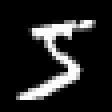

In [34]:
images[1]

Surprise!: We see one of the images before our eyes. This is because Julia knows how to display a matrix of color boxes, via the `Colors.jl` package which was loaded automatically by `Flux.Data.MNIST`. As with the fruit images from the start of the course, the image is an array of color blocks, except that now each pixel just has a grey scale.

To see the actual content of the image, we can do, for example

In [35]:
show(images[1])

Gray{Normed{UInt8,8}}[Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) 

{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0)]

Since we instead would like to view this as an image, we import the `Images` package:

In [36]:
using Images

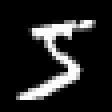

In [37]:
images[1]

We can see several of the images at once:

,,,,,

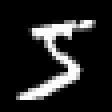
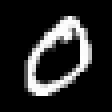
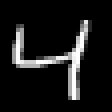
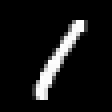
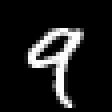
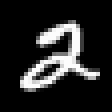

In [38]:
images[1:6]

In [39]:
show(labels[1:6])

[5, 0, 4, 1, 9, 2]

,,
,,
,,

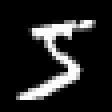
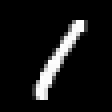
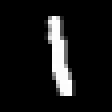
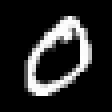
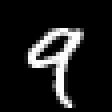
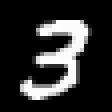
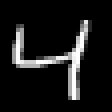
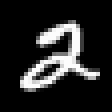
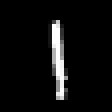

In [40]:
reshape(images[1:9], 3, 3)

In [41]:
(images[1])[20, 20]

#### Exercise 2

Convert the first image to a matrix of `Float64`.

#### Solution

In [42]:
float_image = Float64.(images[1])

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.498039  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.25098   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 ⋮                         

### Munging the data

In the previous notebooks, we arranged the input data for Flux as a `Vector` of `Vector`s.
Now we will use an alternative arrangement, as a matrix, since that allows `Flux` to use matrix operations, which are more efficient.

The column $i$ of the matrix is a vector consisting of the $i$th data point $\mathbf{x}^{(i)}$.  Similarly, the desired outputs are given as a matrix, with the $i$th column being the desired output $\mathbf{y}^{(i)}$.

#### Exercise 3

An image is a matrix of colours, but now we need a vector instead. To do so, we just arrange all of the elements of the matrix in a certain way into a single list; fortunately, Julia already provides the function `vec` to do so!

1. Which order does `vec` use? [This reflects the underlying way in which the matrix is stored in memory.]

2. How can you convert an image into a `Vector` of `Float64`?

3. Define a variable $n$ that is the length of these vectors.

#### Solution

In [43]:
n = length(vec(images[1]))

784

Let's use a subset of $N=5,000$ of the total $60,000$ training images that are available, in order to speed up the training process.

#### Exercise 4
Make a function `rewrite` that accepts a range and converts that range of images to floating-point vectors and stacks them horizontally using `hcat` and the "splat" operator `...`.

We also want a matrix of one-hot vectors. `Flux` provides a function `onehotbatch` to do this (you will need to import it). It works like `onehot`, but takes in a vector of labels and outputs a matrix `Y`.

Return the pair `(X, Y)`.

#### Solution

In [44]:
using Flux: onehotbatch

In [45]:
function rewrite(r)  # rewrite a range r of images

    X = hcat([vec(Float64.(images[i])) for i in r]...)
    Y = onehotbatch(labels[r], 0:9)

    return (X, Y)
end

rewrite (generic function with 1 method)

In [46]:
N = 5_000
X, Y = rewrite(1:N)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [47]:
size(X)

(784, 5000)

## Setting up the neural network

Now we must set up a neural network. Since the data is complicated, we may expect to need several layers.
But we can start with a single layer.

- The network will take as inputs the vectors $\mathbf{x}^{(i)}$, so the input layer has $n$ nodes.

- The output will be a one-hot vector encoding the digit from 1 to 9 or 0 that is desired. There are 10 possible categories, so we need an output layer of size 10.

It is then our task as neural network designers to insert layers between these input and output layers, whose weights will be tuned during the learning process. *This is an art, not a science*! But major advances have come from finding a good structure for the network.

### Softmax

We will make a network with a single layer; let's choose each neuron in the layer to use the `relu` activation function.
The output `relu` can be arbitrarily large, but in the end we will wish to compare the network's output with one-hot vectors, i.e. values between $0$ and $1$.

In order to make this work, we will thus use an extra function at the end that takes in a vector of arbitrary real numbers and maps it ("squashes it down") to a vector of numbers between $0$ and $1$.

The most used function with this property is $\mathrm{softmax}$. Firstly we take the exponential of each input variable to make them positive. Then we divide by the sum to make sure they lie between $0$ and $1$.

<!-- $$\mathrm{softmax}(\mathbf{x})_i := \frac{\exp (x_i)}{\sum_j \exp(x_j)}$$ -->

Note that here we have written the result for the $i$th component of the function $\mathbf{R}^n \to \mathbf{R}^n$. Note also that the function returns a vector of numbers that are positive, and whose components sum to $1$. Thus, in fact, they can be thought of as probabilities.

In the neural network context, using a `softmax` after the final layer thus allows us to interpret the outputs as probabilities, in our case the probability that the network assigns that a given image represents each possible output value ($0$-$9$)!

#### Exercise 5

Make a neural network with one single layer, using the function $\sigma$, and a final `softmax`.

#### Solution

In [48]:
n = length(vec(images[1]))

model =
  Chain(
      Dense(n, 10, relu),  #   Dense(10, 10),
      softmax
  )

Chain(Dense(784, 10, relu), softmax)

We need a loss function. It is usual to use the "cross-entropy" instead of the mean-squared error. This is because the mean-squared error can cause learning to be slower.

In [49]:
loss(x, y) = Flux.crossentropy(model(x), y)

loss (generic function with 1 method)

Finally, we need to specify an optimizer:

In [50]:
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

## Training

As we know, **training** consists of iteratively adjusting the model's parameters to decrease the `loss` function. Which parameters need to be adjusted? All of them!

Since the `loss` function contains a call to the `model` function, using `gradient` with respect to the model's `params` updates the information about the gradient of the loss function with respect to *every node in the network!*:

In [51]:
l = loss(X, Y)

2.3395824f0

This is what is going on inside the `train!` function.
In fact, `train!(loss, params(model), data, opt)` iterates over each object in `data` and runs this function.
For this reason, `data` must consist of an iterable object that returns pairs `(X, Y)` at each step.

The simplest possibility is

In [52]:
data = ((X, Y), )  # one-element tuple

(([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0]),)

Alternatively, we can make one call to the `train!` function iterate over several copies of `data`, using `repeated`. This is an **iterator**; it does not copy the data 100 times, which would be very wasteful; it just gives an object that repeatedly loops over the same data:

In [53]:
dataset = Base.Iterators.repeated((X, Y), 100)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}}}(Base.Iterators.Repeated{Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}}(([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0])), 100)

#### Exercise 6

Train the model on a subset of $N$ images with $N = 5000$.

In [54]:
N = 5_000
X, Y = rewrite(1:N)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0])

The function `loss` evaluated on the matrices gives the overall loss:

In [55]:
loss(X, Y)

2.3395824f0

In [56]:
@time Flux.train!(loss, params(model), data, opt)

 44.473457 seconds (63.39 M allocations: 2.574 GiB, 3.35% gc time)


In [57]:
@time Flux.train!(loss, params(model), dataset, opt)

131.991241 seconds (1.96 G allocations: 36.866 GiB, 9.77% gc time)


This is (approximately) equivalent to just doing a `for` loop to run the previous `train!` command 100 times.

### Using callbacks

The `train!` function can take an optional keyword argument, `cb` (short for "CallBack"). A callback function is a function that you provide as an argument to a function `f`, which "calls back" your function every so often.

This provides the possibility to provide a function that is called at each step or every so often during the training process.
A common use case is to provide a visual trace of the training process by printing out the current value of the `loss` function:

In [58]:
callback() = @show(loss(X, Y))

Flux.train!(loss, params(model), data, opt; cb = callback)

loss(X, Y) = 1.0057555f0


In [ ]:
Flux.train!(loss, params(model), dataset, opt; cb = callback)

However, it is expensive to calculate the complete `loss` function and it is not necessary to output it every step. So `Flux` also provides a function `throttle`, that provides a mechanism to call a given function at most once every certain number of seconds:

In [ ]:
Flux.train!(loss, params(model), dataset, opt; cb = Flux.throttle(callback, 1))

In [ ]:
for i in 1:100
    Flux.train!(loss, params(model), dataset, opt; cb = Flux.throttle(callback, 1))
end

## Testing phase

We now have trained a model, i.e. we have found the parameters `W` and `b` for the network layer(s). In order to **test** if the learning procedure was really successful, we check how well the resulting trained network performs when we test it with images that the network has not yet seen!

Often, a dataset is split up into "training data" and "test (or validation) data" for this purpose, and indeed the MNIST data set has a separate pool of training data. We can instead use the images that we have not included in our reduced training process.

#### Exercise 7

Take the next 100 images after those that were used for training. How well does it do?

In [59]:
X_test, Y_test = rewrite(N+1:N+100)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [60]:
loss(X_test, Y_test)

1.0897357f0

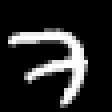

7

In [61]:
display(images[N+1])
labels[N+1]

In [62]:
[model(X_test[:,1]) Y_test[:,1]]

10×2 Array{Float32,2}:
 0.0213204  0.0
 0.0213204  0.0
 0.100837   0.0
 0.0213204  0.0
 0.0292581  0.0
 0.0213204  0.0
 0.0213204  0.0
 0.701295   1.0
 0.0213204  0.0
 0.0406882  0.0

In [63]:
loss(X_test[:,1], Y_test[:,1])

0.35482687f0

In [64]:
loss(X_test, Y_test)

1.0897357f0

#### Exercise 8

Use the `indmax` function to write a function `prediction` that reports which digit `model` predicts, as the index with the maximum weight.

#### Solution

In [ ]:
prediction(i) = findmax(model(Float64.(vec(images[i]))))[2] # returns (max_value, index)

#### Exercise 9

Count the number of correct predictions over the whole data set, and hence the percentage of images that are correctly predicted. [This percentage is what is used to compare different machine learning techniques.]

#### Solution

In [ ]:
which_correct = [prediction(i) == (labels[i]) + 1 for i in 1:length(images)];

In [ ]:
percentage = 100 * count(which_correct) / length(images)

## Improving the prediction

So far we have used a single layer. In order to improve the prediction, we probably need to use more layers.

#### Exercise 10

Introduce an intermediate, hidden layer. Does it give a better prediction?

#### Exercise 11

Examine how the Fluxml.ai's playground defines this model. What is the
`Flux.Conv` and how can you reshape your data to use it?